In [4]:
# Import necessary packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [5]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0],date_parser=parser)
sales.head()

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Date    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [25]:
sales.columns=['Quantity']
sales.head()

,Quantity
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


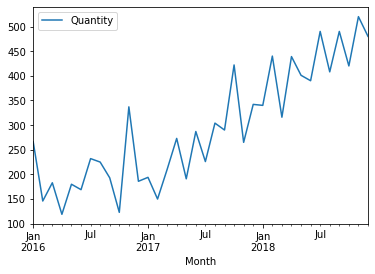

In [24]:
sales.plot()
plt.show()

- Stationary means Mean, Variance and Co-Variance are constant over periods

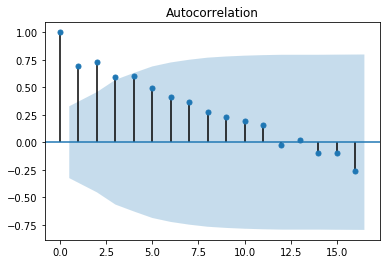

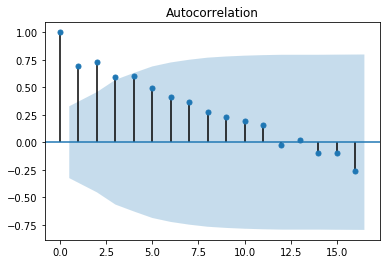

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

# Converting Series to Stationarity

In [29]:
sales_diff = sales.diff(periods=1)
# integrated of oder 1,enoted by d(for diff), one of the parameter of ARIMA model

In [36]:
1

,Date
Month,
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0


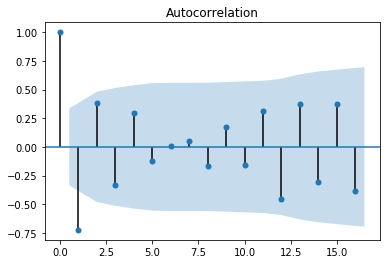

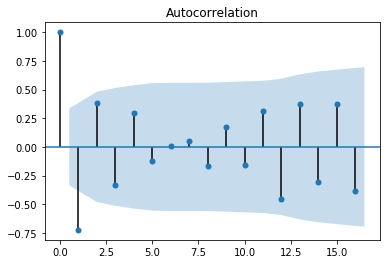

In [37]:
plot_acf(sales_diff)

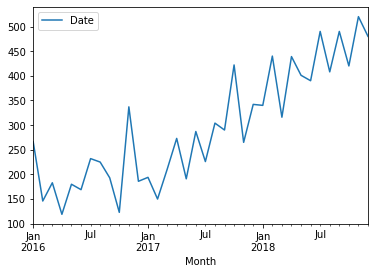

In [39]:
sales.plot()
plt.show()

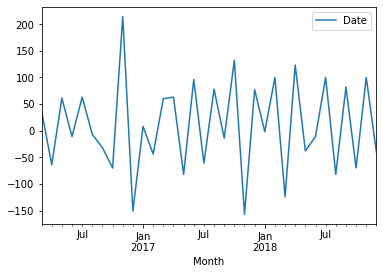

In [38]:
sales_diff.plot()
plt.show()

In [85]:
X = sales.values
print(X.ndim, X.shape)
train = X[0:27]
test = X[27:]
predictions = []

2 (36, 1)


In [49]:
train.shape

(27, 1)

In [50]:
test.shape

(9, 1)

# Autoregressive Model(AR)

In [52]:
from statsmodels.tsa.ar_model import AR
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [57]:
predictions = model_ar_fit.predict(start=26,end=36)

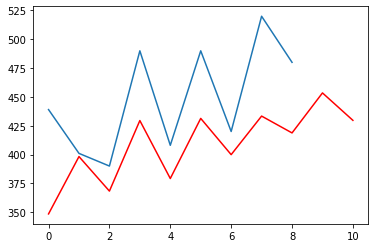

In [58]:
plt.plot(test)
plt.plot(predictions,color='red')

# ARIMA Model

In [64]:
from statsmodels.tsa.arima_model  import ARIMA

In [66]:
#p,d,q -> p = periods taken for autoregressive model
# d -> Integrated of order, difference
# q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

294.85435842186024


In [69]:
predictions = model_arima_fit.forecast(steps=9)[0]
predictions

array([393.12491233, 367.08450679, 432.19168607, 370.1811773 ,
       424.07800322, 400.3334276 , 444.76773981, 412.5415048 ,
       450.35920483])

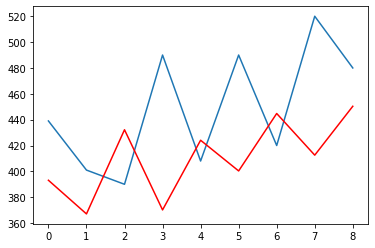

In [71]:
plt.plot(test)
plt.plot(predictions, color='red')

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, predictions)

4525.490583841247

In [74]:
# Iteration tools
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817